In [6]:
pip install pandas


# New Section

In [4]:
pip install numpy


In [5]:
    pip install matplotlib

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

column_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
    'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
    'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
    'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
    'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
    'price']



df = pd.read_csv('/content/Automobile_data.csv', names=column_names, header=0)
df['wheel-base'] = pd.to_numeric(df['wheel-base'], errors='coerce')
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [11]:
df = df.replace('?', np.nan)

In [12]:
# Langkah 1: Handle missing values in 'price' dan reset index
df.dropna(subset=['price'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

# Langkah 2: Handle missing values in categorical column
df['num-of-doors'] = df['num-of-doors'].fillna('four')  # Alternatif lebih aman dari inplace

# Langkah 3: Handle missing values in numerical columns
numerical_cols = ['normalized-losses', 'stroke', 'bore', 'horsepower', 'peak-rpm']

for col in numerical_cols:
    # Ganti placeholder non-numerik (?) dengan NaN
    df[col] = df[col].replace('?', np.nan)

    # Konversi ke float dan isi missing values dengan mean
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Lebih robust dari astype
    col_mean = df[col].mean()
    df[col] = df[col].fillna(col_mean)

# Tampilkan 5 baris pertama
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [13]:
# Contoh untuk 'normalized-losses'
df['normalized-losses'] = df['normalized-losses'].replace('?', np.nan)
df['normalized-losses'] = df['normalized-losses'].astype('float')
avg_norm = df['normalized-losses'].mean(axis=0)
df['normalized-losses'].replace(np.nan, avg_norm, inplace=True)

<ipython-input-13-3a65fec43d40>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['normalized-losses'].replace(np.nan, avg_norm, inplace=True)


In [14]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [15]:
# Hitung jumlah setiap 'make'
group_make = df.groupby('make').size()

# Ubah jadi DataFrame dan beri nama kolom
df_tot = pd.DataFrame({'make': group_make.index, 'total': group_make.values})

# Tampilkan
print(df_tot)


             make  total
0     alfa-romero      3
1            audi      6
2             bmw      8
3       chevrolet      3
4           dodge      9
5           honda     13
6           isuzu      2
7          jaguar      3
8           mazda     17
9   mercedes-benz      8
10        mercury      1
11     mitsubishi     13
12         nissan     18
13         peugot     11
14       plymouth      7
15        porsche      4
16        renault      2
17           saab      6
18         subaru     12
19         toyota     32
20     volkswagen     12
21          volvo     11


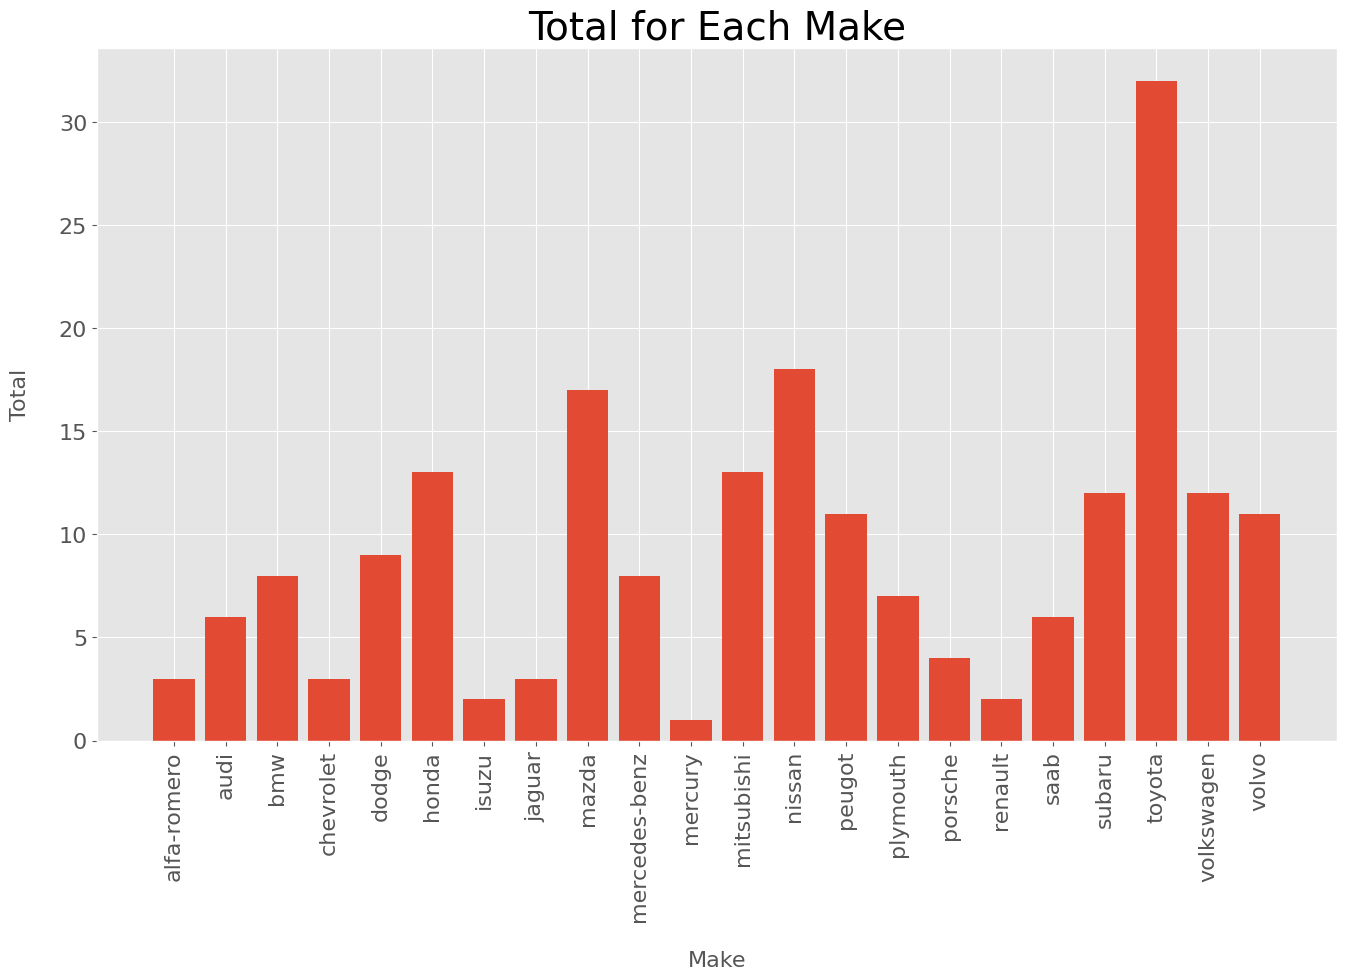

In [16]:
plt.figure(figsize=(16, 9))
plt.bar(df_tot['make'], df_tot['total'])

plt.title('Total for Each Make', size=28)
plt.xlabel('\nMake', size=16)
plt.ylabel('Total\n', size=16)
plt.xticks(size=16, rotation=90)
plt.yticks(size=16)
plt.show()

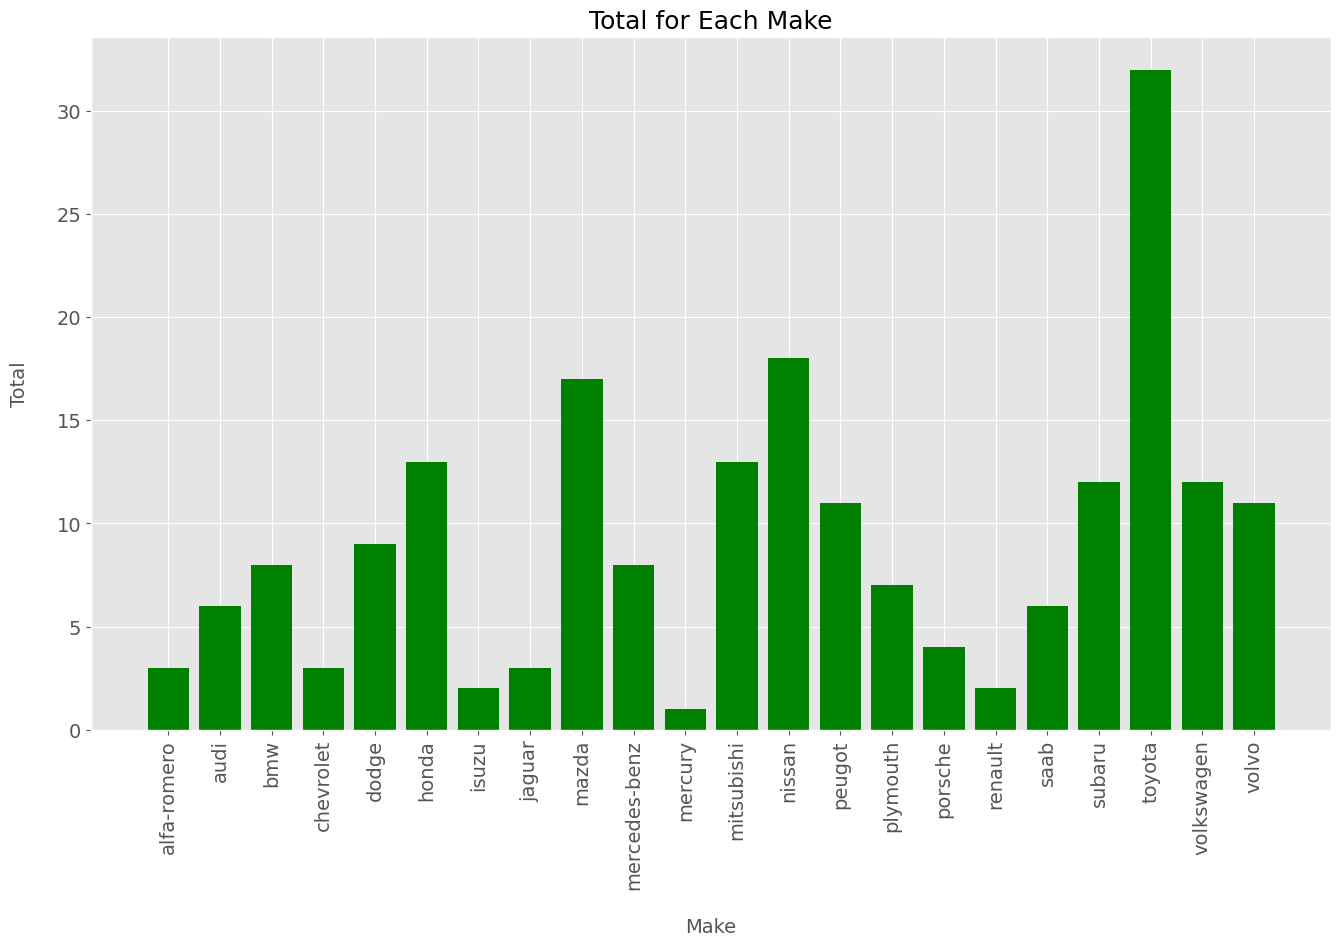

In [17]:
plt.figure(figsize=(16, 9))
plt.bar(df_tot['make'], df_tot['total'], color='green')

plt.title('Total for Each Make', size=18)
plt.xlabel('\nMake', size=14)
plt.ylabel('Total\n', size=14)
plt.xticks(size=14, rotation=90)
plt.yticks(size=14)
plt.show()

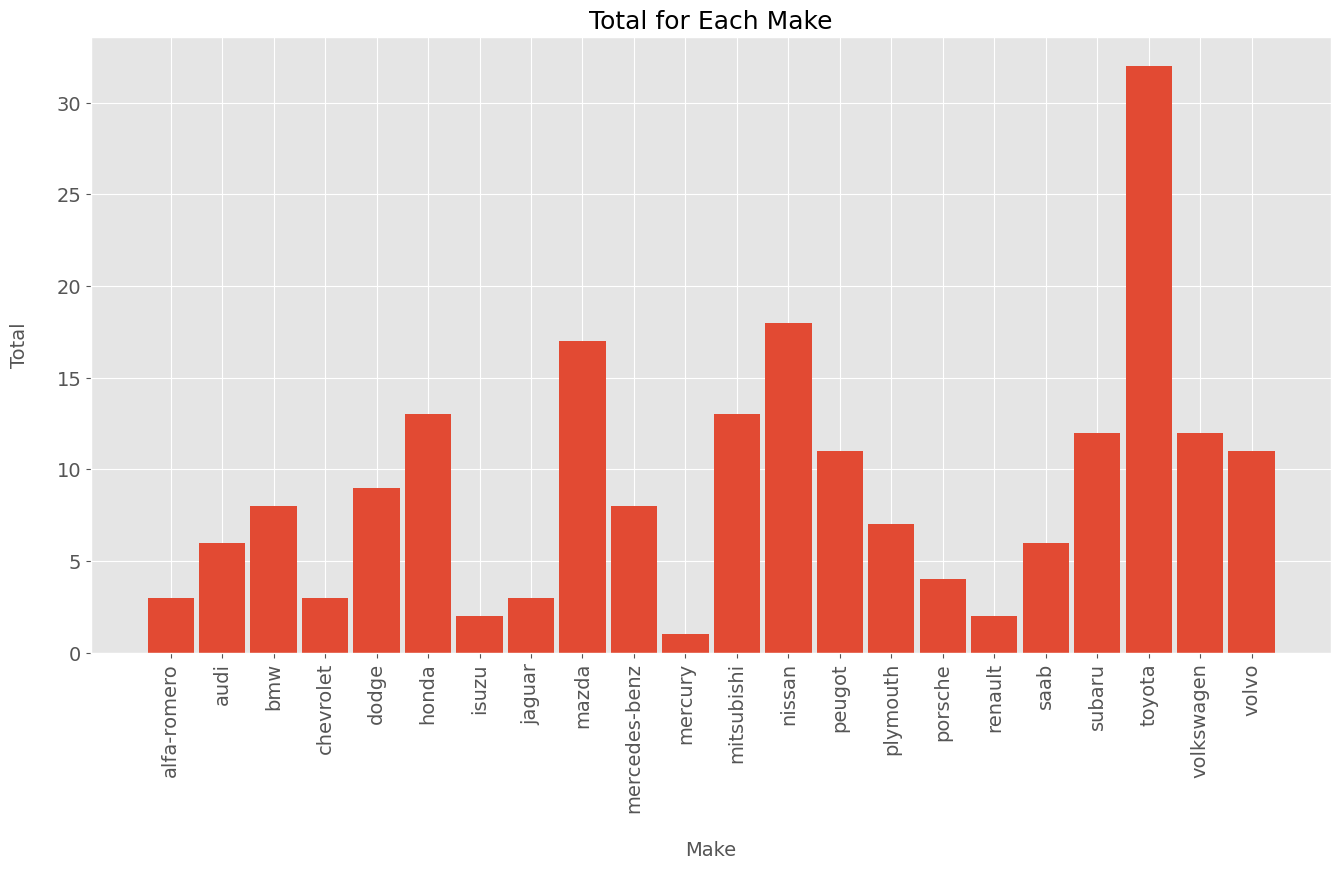

In [18]:
plt.figure(figsize=(16, 8))
plt.bar(df_tot['make'], df_tot['total'], width=0.9)

plt.title('Total for Each Make', size=18)
plt.xlabel('\nMake', size=14)
plt.ylabel('Total\n', size=14)
plt.xticks(size=14, rotation=90)
plt.yticks(size=14)
plt.show()

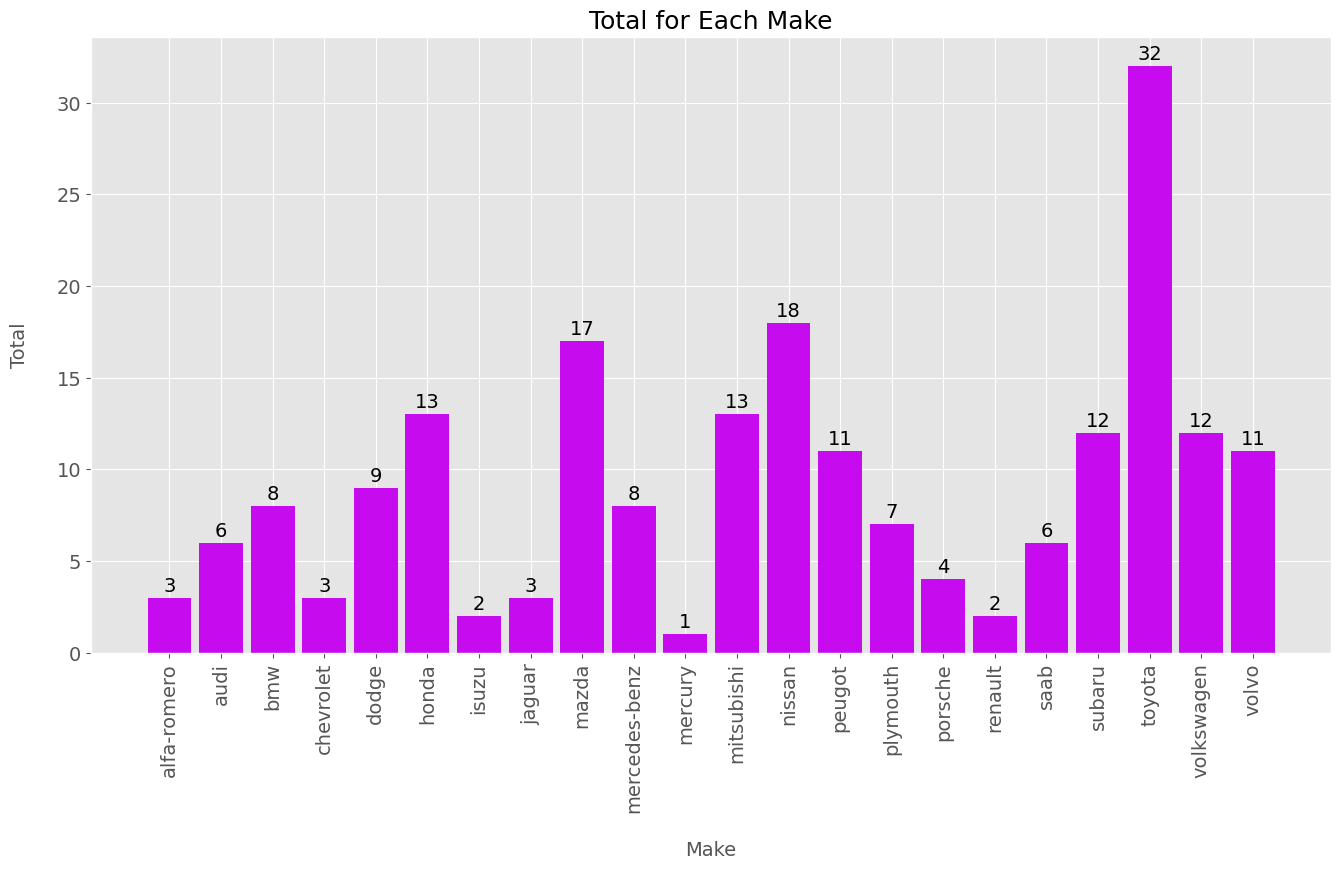

In [19]:
fig, ax = plt.subplots(figsize=(16, 8))
plot_data = ax.bar(df_tot['make'], df_tot['total'], color='#c60cef', width=0.85)
for rect in plot_data:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
               xy=(rect.get_x() + rect.get_width() / 2, height),
               xytext=(0, 2),
               textcoords='offset points',
               ha='center',
               va='bottom',
               fontsize=14)

plt.title('Total for Each Make', size=18)
plt.xlabel('\nMake', size=14)
plt.ylabel('Total\n', size=14)
plt.xticks(size=14, rotation=90)
plt.yticks(size=14)
plt.show()

In [20]:
wheel_mean = df.groupby ('make') ['wheel-base'].mean()
wheel_std = df.groupby ('make') ['wheel-base'].std()

df_mean  = pd.DataFrame (wheel_mean).reset_index()
df_std = pd.DataFrame (wheel_std).reset_index()

df_mean = df_mean.rename (columns= {'wheel-base': 'wheel-base-mean'})
df_std = df_std.rename (columns= {'wheel-base': 'wheel-base-std'})

In [21]:
df_join = pd.merge (df_mean, df_std, on='make')
df_join

,make,wheel-base-mean,wheel-base-std
0,alfa-romero,90.566667,3.406367
1,audi,102.733333,3.362539
2,bmw,103.162500,2.988042
3,chevrolet,92.466667,3.521837
4,dodge,95.011111,3.192352
5,honda,94.330769,3.632810
6,isuzu,95.150000,1.202082
7,jaguar,109.333333,6.350853
8,mazda,97.017647,3.806776
9,mercedes-benz,110.925000,7.261788


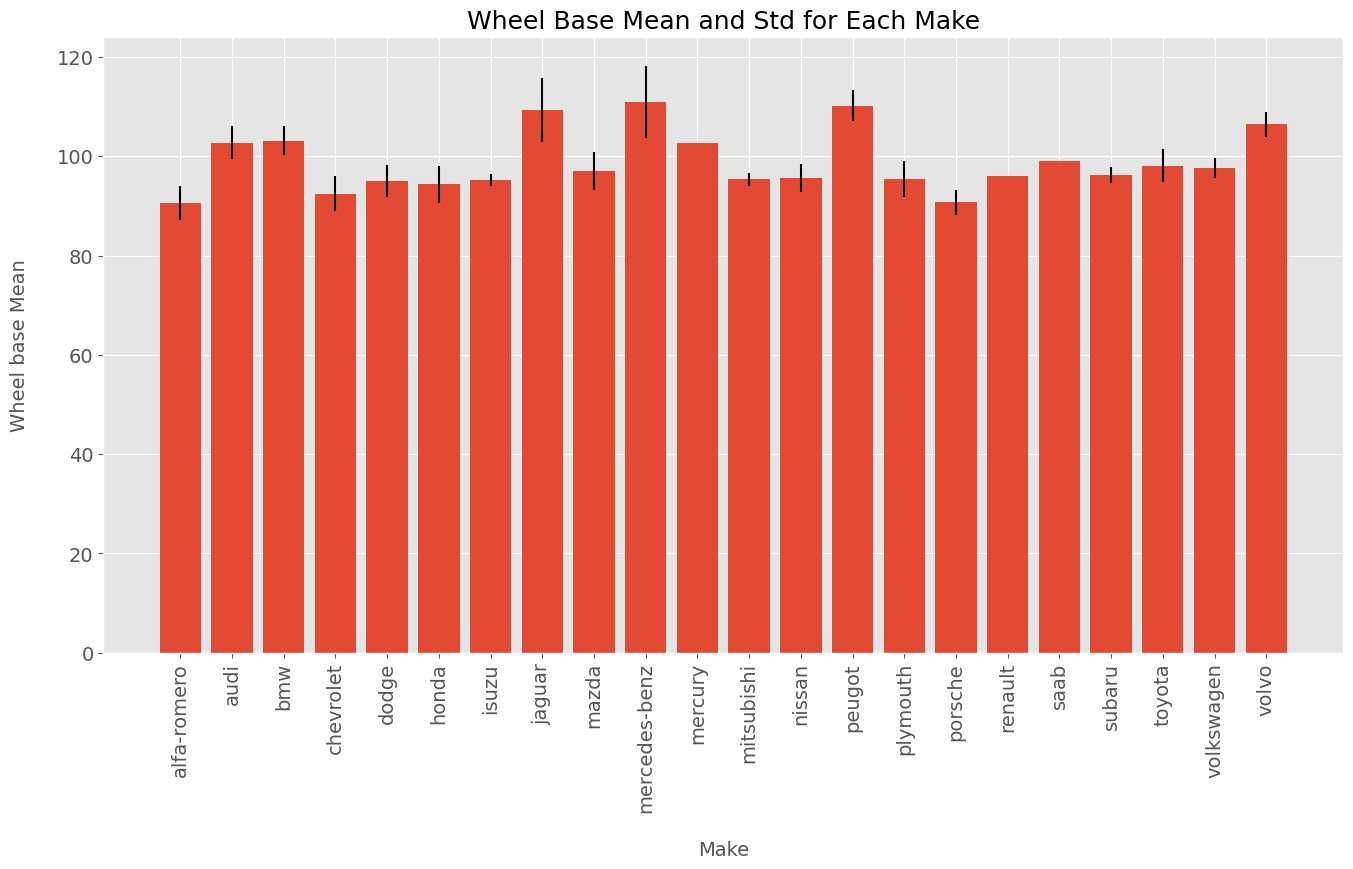

In [22]:
plt.figure (figsize=(16, 8))
plt.bar(df_join['make'], df_join['wheel-base-mean'], width=0.8,
        yerr=df_join['wheel-base-std'])

plt.title('Wheel Base Mean and Std for Each Make', size=18)
plt.xlabel('\nMake', size=14)
plt.ylabel('Wheel base Mean\n', size=14)
plt.xticks(size=14, rotation=90)
plt.yticks(size=14)
plt.show()

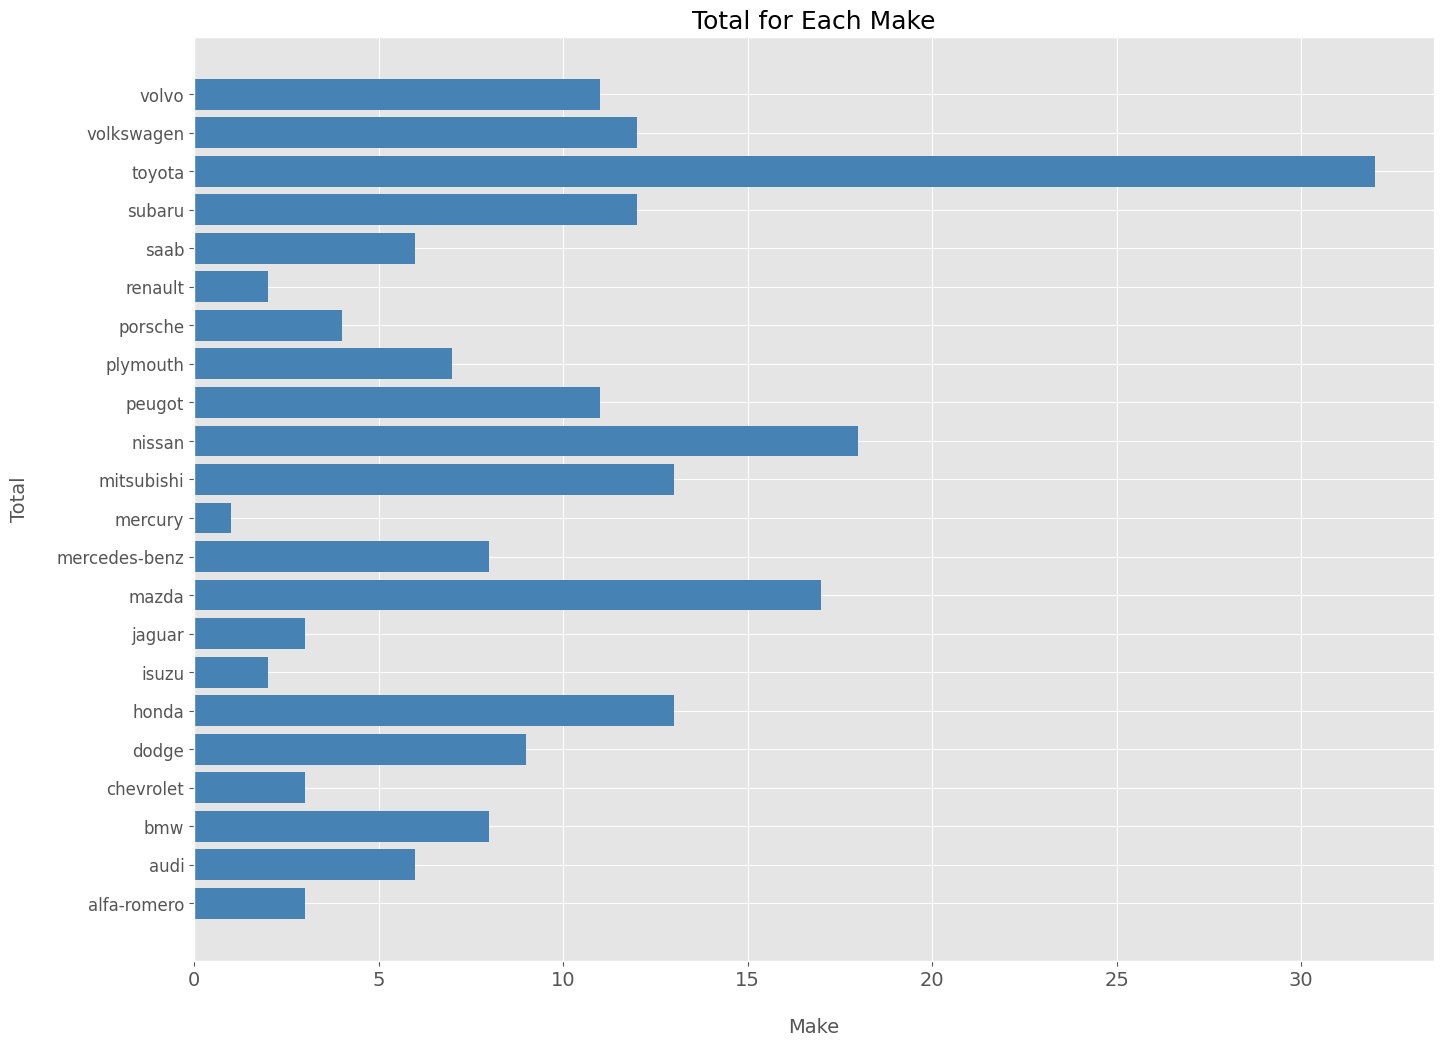

In [23]:
plt.figure(figsize=(16, 12))
plt.barh(df_tot['make'], df_tot['total'], color='steelblue')

plt.title('Total for Each Make', size=18)
plt.xlabel('\nMake', size=14)
plt.ylabel('Total\n', size=14)
plt.xticks(size=14)
plt.yticks(size=12)
plt.show()

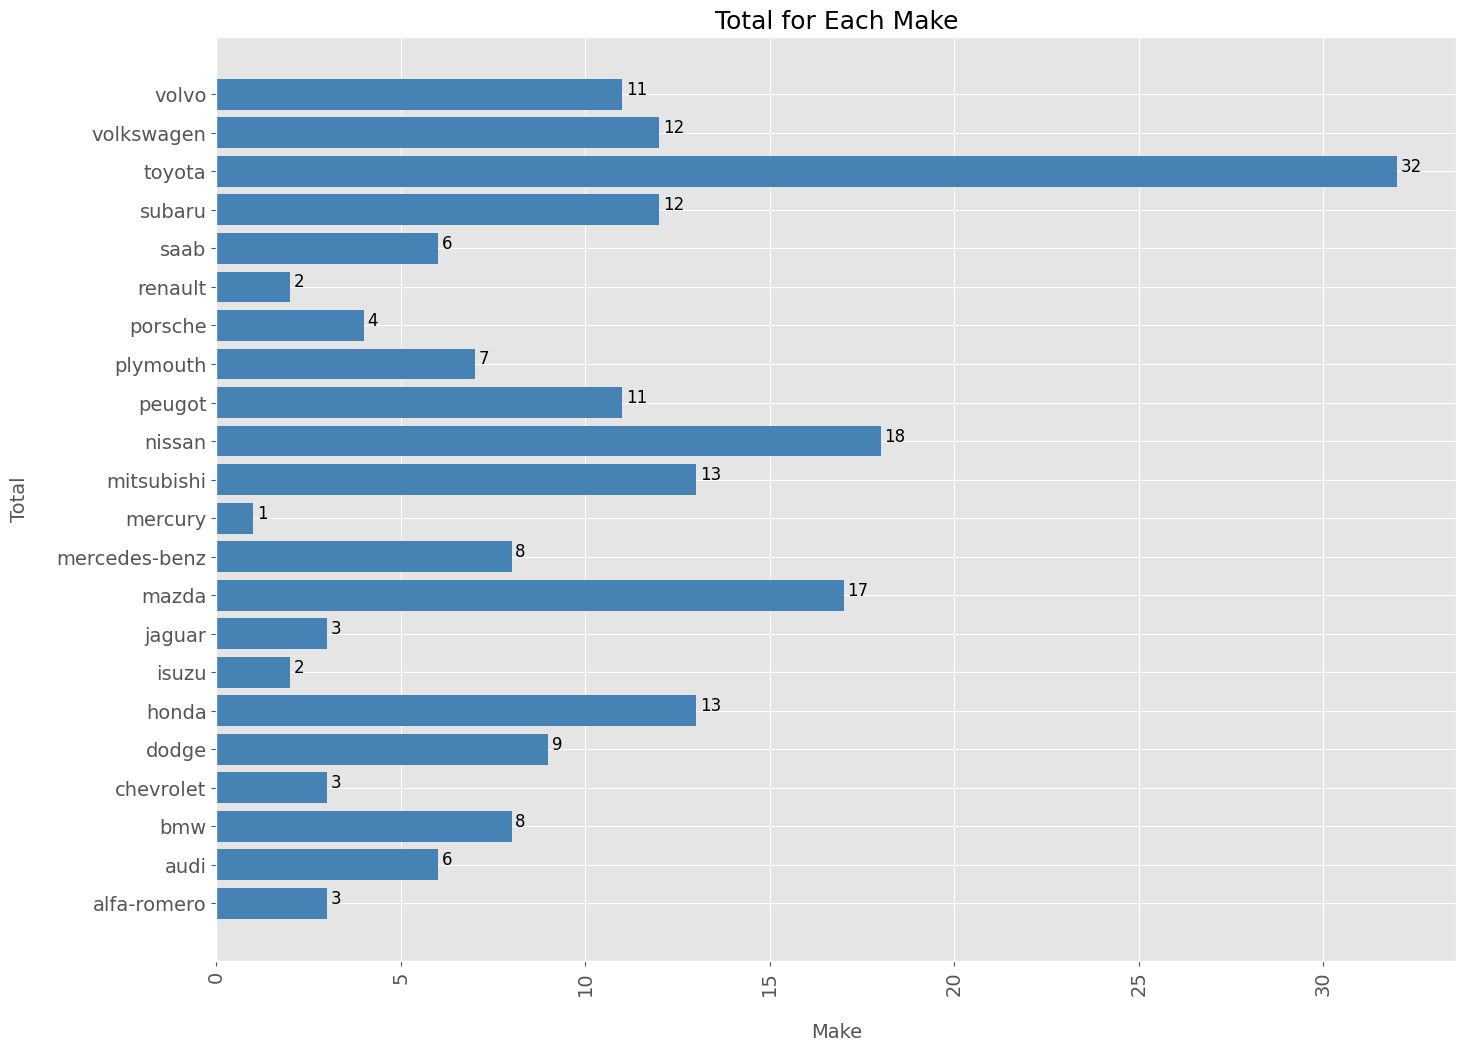

In [24]:
plt.figure(figsize=(16, 12))
plot_data = plt.barh(df_tot['make'], df_tot['total'], color='steelblue')

for index, value in enumerate(df_tot['total']):
    plt.annotate(value, xy=(value + 0.1, index), fontsize=12)

plt.title('Total for Each Make', size=18)
plt.xlabel('\nMake', size=14)
plt.ylabel('Total\n', size=14)
plt.xticks(size=14, rotation=90)
plt.yticks(size=14)
plt.show()


In [25]:
body_style=df.groupby(['body-style', 'fuel-type']).size()
df_body = pd.DataFrame(body_style).reset_index()
df_body = df_body.rename(columns={0: 'total'})
df_body

,body-style,fuel-type,total
0,convertible,gas,6
1,hardtop,diesel,1
2,hardtop,gas,7
3,hatchback,diesel,1
4,hatchback,gas,67
5,sedan,diesel,15
6,sedan,gas,79
7,wagon,diesel,3
8,wagon,gas,22


In [26]:
body = list(df_body['body-style'].unique())
body

['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon']

In [27]:
gas = df_body[df_body['fuel-type']=='gas'].sort_values(
    by='body-style').reset_index(drop=True)
gas

,body-style,fuel-type,total
0,convertible,gas,6
1,hardtop,gas,7
2,hatchback,gas,67
3,sedan,gas,79
4,wagon,gas,22


In [28]:
diesel = df_body[df_body['fuel-type']=='diesel']
diesel

,body-style,fuel-type,total
1,hardtop,diesel,1
3,hatchback,diesel,1
5,sedan,diesel,15
7,wagon,diesel,3


In [29]:
new_data = {'body-style': 'convertible', 'fuel-type': 'diesel', 'total': 0}
diesel = pd.concat([diesel, pd.DataFrame([new_data])], ignore_index=True).sort_values(
    by='body-style').reset_index(drop=True)
diesel


,body-style,fuel-type,total
0,convertible,diesel,0
1,hardtop,diesel,1
2,hatchback,diesel,1
3,sedan,diesel,15
4,wagon,diesel,3


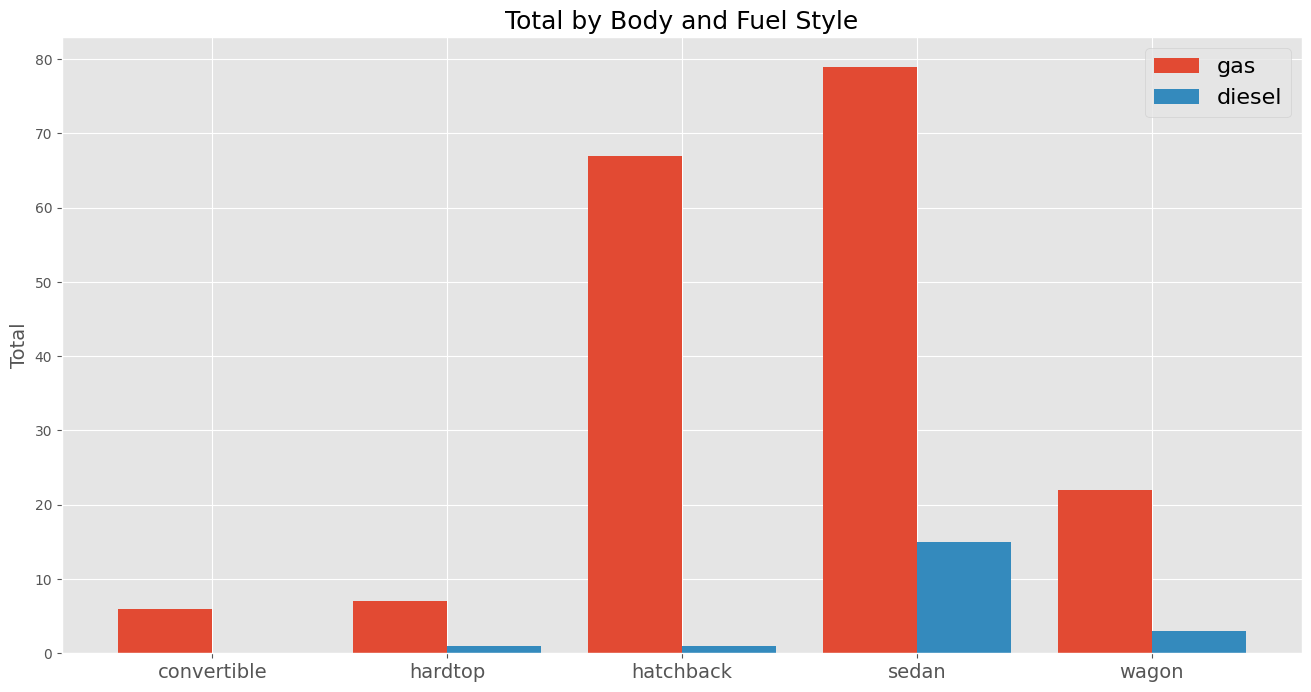

In [30]:
x = np.arange(len(body))
width = 0.4
labels = body

fig, ax = plt.subplots(figsize=(16, 8))
d1 = ax.bar(x - width/2, gas['total'], width=width, label='gas')
d2 = ax.bar(x + width/2, diesel['total'], width=width, label='diesel')

ax.set_title('Total by Body and Fuel Style', size=18)
ax.set_ylabel('Total', size=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, size=14)
ax.legend(fontsize=16)
plt.show()


In [44]:
def peaklabel(data):
    for rect in data:
        height = rect.get_height()
        ax.annotate(f'{height:.0f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center',
                    va='bottom',
                    fontsize=14)

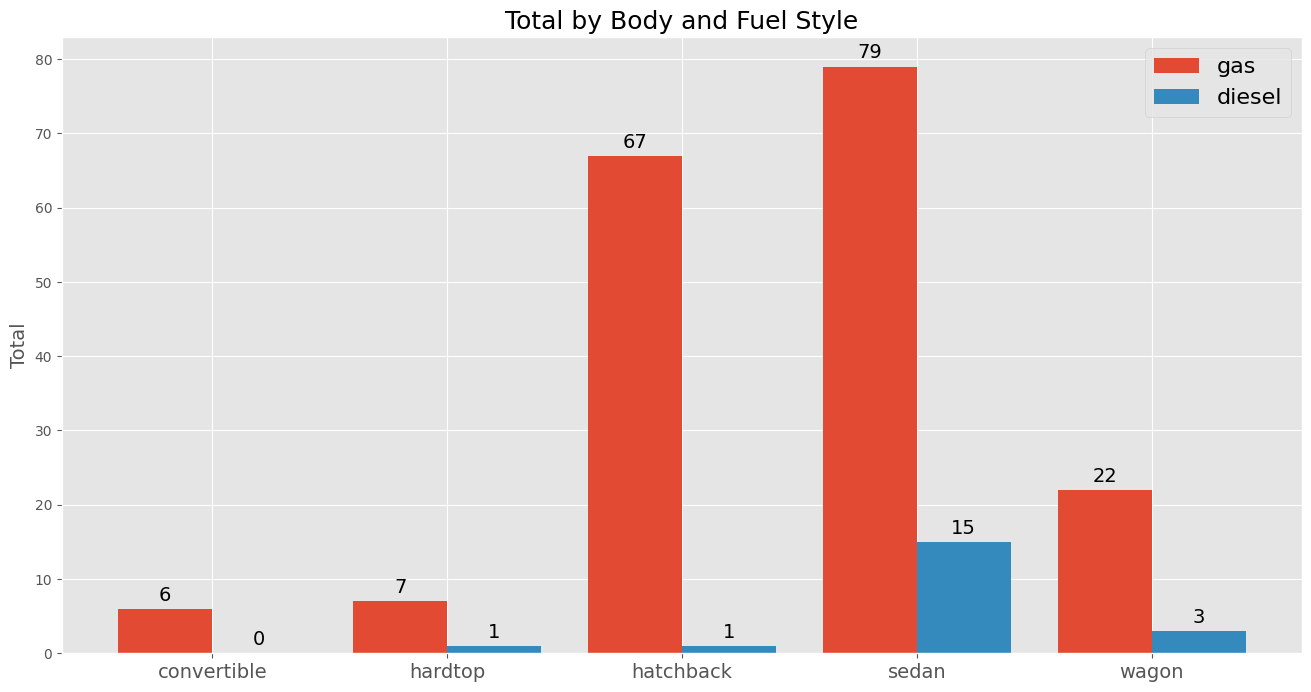

In [46]:

x = np.arange(len(body))
width = 0.4
labels = body

fig, ax = plt.subplots(figsize=(16, 8))
d1 = ax.bar(x - width/2, gas['total'], width, label='gas')
d2 = ax.bar(x + width/2, diesel['total'], width, label='diesel')

ax.set_title('Total by Body and Fuel Style', size=18)
ax.set_ylabel('Total', size=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, size=14)
ax.legend(fontsize=16)

peaklabel(d1)
peaklabel(d2)

plt.show()

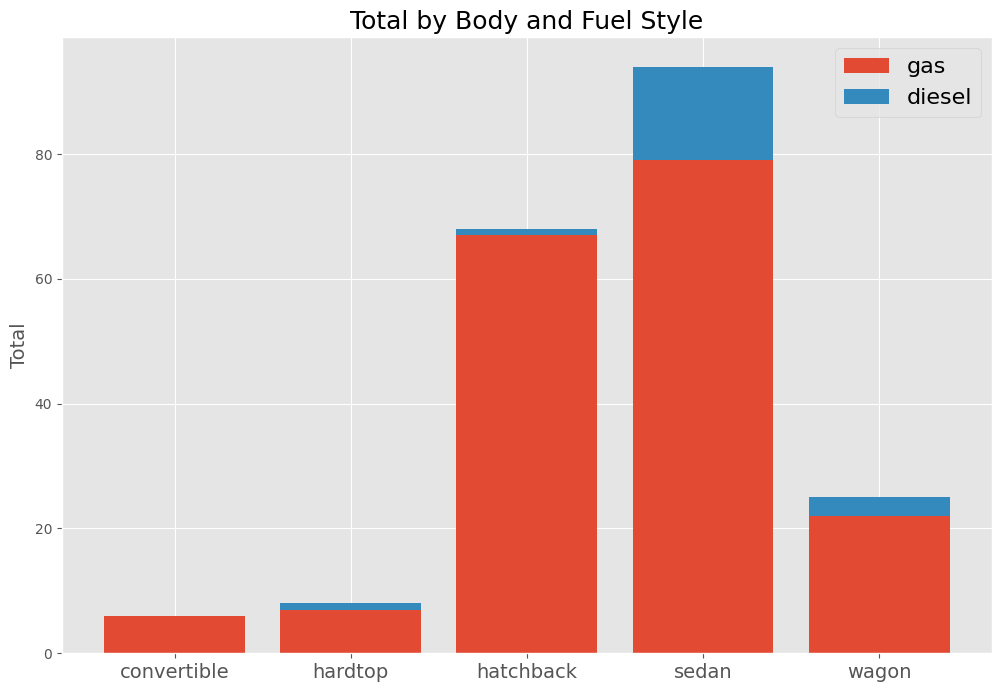

In [40]:
x = np.arange(len(body))
labels = body

fig, ax = plt.subplots(figsize=(12, 8))
d1 = ax.bar(x, gas['total'], label='gas')
d2 = ax.bar(x, diesel['total'], label='diesel', bottom=gas['total'])

ax.set_title('Total by Body and Fuel Style', size=18)
ax.set_ylabel('Total', size=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, size=14)

ax.legend(fontsize=16)

plt.show()
